In [243]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [120]:
#getting the base  URL for API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#final URL for all the cities
city_list = []
# set up lists to hold reponse info
lat = []
lng =[]
humidity =[]
cloudiness =[]
country =[]
temp = []
windspeed =[]
date =[]
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
nb_tries = 10
for city in cities:
    final_url =f"{base_url}appid={weather_api_key}&q={city}"
    #requst API
    weather_data = requests.get(final_url)
    print(f'Processing Record {counter} | {city}')
    print(final_url)
    
    try:
        weather_data.raise_for_status()
        data = weather_data.json()
        #print(data) # to check the key structure
        time.sleep(1)
        city_list.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])      
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])    
        windspeed.append(data['wind']['speed'])
    except requests.exceptions.HTTPError as e:
        print('City not found. skipping...')
        print(str(e))
    except ConnectionError as err:
        if nb_tries == 0:
            raise err
        else:
            time.sleep(1)
    counter +=1
    nb_tries -= 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing Record 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=ribeira grande
Processing Record 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=rikitea
Processing Record 3 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=mar del plata
Processing Record 4 | labuhan
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=labuhan
Processing Record 5 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=bluff
Processing Record 6 | raha
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=raha
Processing Record 7 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kapaa
Processing Record 8 | tshikapa
http://api.openweathermap.or

Processing Record 60 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=sao filipe
Processing Record 61 | austin
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=austin
Processing Record 62 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=hambantota
Processing Record 63 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=north bend
Processing Record 64 | valentin gomez farias
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=valentin gomez farias
Processing Record 65 | gander
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=gander
Processing Record 66 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=punta arenas
Processing Record 67 | hermanus
http://api.openweathermap.o

Processing Record 115 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=quatre cocos
Processing Record 116 | ust-maya
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=ust-maya
Processing Record 117 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=jumla
Processing Record 118 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=vila velha
Processing Record 119 | bilma
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=bilma
Processing Record 120 | katobu
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=katobu
Processing Record 121 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=srednekolymsk
Processing Record 122 | new norfolk
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 171 | nizwa
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=nizwa
Processing Record 172 | quixada
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=quixada
Processing Record 173 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=hovd
Processing Record 174 | hami
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=hami
Processing Record 175 | stornoway
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=stornoway
Processing Record 176 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kruisfontein
Processing Record 177 | xingcheng
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=xingcheng
Processing Record 178 | banjarmasin
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1

Processing Record 227 | conchagua
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=conchagua
Processing Record 228 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=fortuna
Processing Record 229 | pochutla
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=pochutla
Processing Record 230 | sibuco
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=sibuco
Processing Record 231 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=pisco
Processing Record 232 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kodiak
Processing Record 233 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=pacific grove
Processing Record 234 | laizhou
http://api.openweathermap.org/data/2.5/weather?appid=bc922c888

Processing Record 282 | villanueva de cordoba
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=villanueva de cordoba
Processing Record 283 | igrim
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=igrim
Processing Record 284 | winnemucca
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=winnemucca
Processing Record 285 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=paamiut
Processing Record 286 | tondano
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=tondano
Processing Record 287 | mecca
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=mecca
Processing Record 288 | norwich
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=norwich
Processing Record 289 | sitka
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 338 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=faanui
Processing Record 339 | suntar
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=suntar
Processing Record 340 | cam ranh
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=cam ranh
Processing Record 341 | colon
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=colon
Processing Record 342 | nkhata bay
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=nkhata bay
Processing Record 343 | guicheng
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=guicheng
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=guicheng
Processing Record 344 | cairns
http://api.openweathermap.org/data/2.

Processing Record 393 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=saint george
Processing Record 394 | anloga
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=anloga
Processing Record 395 | salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=salinopolis
Processing Record 396 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=rawson
Processing Record 397 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=clyde river
Processing Record 398 | sakakah
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=sakakah
Processing Record 399 | dukat
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=dukat
Processing Record 400 | newport
http://api.openweathermap.org/data/2.5/weather?appid=b

Processing Record 451 | road town
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=road town
Processing Record 452 | ishinomaki
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=ishinomaki
Processing Record 453 | taonan
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=taonan
Processing Record 454 | groningen
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=groningen
Processing Record 455 | harper
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=harper
Processing Record 456 | brazzaville
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=brazzaville
Processing Record 457 | tire
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=tire
Processing Record 458 | mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=bc922

Processing Record 512 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=coquimbo
Processing Record 513 | tahoua
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=tahoua
Processing Record 514 | agua verde
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=agua verde
Processing Record 515 | rudbar
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=rudbar
Processing Record 516 | faya
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=faya
Processing Record 517 | luena
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=luena
Processing Record 518 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=dingle
Processing Record 519 | ribeira brava
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a8

Processing Record 567 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=makakilo city
Processing Record 568 | tevriz
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=tevriz
Processing Record 569 | kintampo
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kintampo
Processing Record 570 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=lavrentiya
Processing Record 571 | cervo
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=cervo
Processing Record 572 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=marsa matruh
Processing Record 573 | otake
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=otake
Processing Record 574 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 630 | bayan
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=bayan
Processing Record 631 | yeletskiy
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=yeletskiy
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=yeletskiy
Processing Record 632 | inuvik
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=inuvik
Processing Record 633 | fort saint john
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=fort saint john
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=fort%20saint%20john
Processing Record 634 | gudiyattam
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=gudiyattam
City

## Convert Raw Data to DataFrame
. Export the city data into a .csv

. Display the DataFrame

In [204]:
#create dataframe for the json response 
weather_df = pd.DataFrame({'City':city_list,'Latitude':lat,'Longitude':lng,'Wind Speed':windspeed
                           ,'Humidity':humidity,'Max Temp':temp,'Cloudiness':cloudiness,'Date':date,'Country':country})
#convert max temp to fahrenheit
weather_df['Max Temp'] = ((weather_df['Max Temp'] -273.15)*1.8+32)
#print the dataframe to check 
weather_df.head(10)

,City,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date,Country
0,ribeira grande,38.5167,-28.7000,2.06,83,68.396,20,1627627999,PT
1,rikitea,-23.1203,-134.9692,2.23,70,71.402,0,1627628107,PF
2,mar del plata,-38.0023,-57.5575,0.89,70,46.004,0,1627628108,AR
3,labuhan,-6.8844,112.2051,4.73,57,87.764,26,1627628109,ID
4,bluff,-46.6000,168.3333,0.13,81,49.802,100,1627628110,NZ
5,raha,26.2333,92.5167,3.17,68,89.474,99,1627628112,IN
6,kapaa,22.0752,-159.3190,4.86,76,80.582,96,1627628113,US
7,tshikapa,-6.4167,20.8000,2.91,26,81.464,6,1627628114,CD
8,ponta do sol,32.6667,-17.1000,2.95,78,70.430,23,1627628115,PT
9,constitucion,-35.3333,-72.4167,1.63,75,50.072,0,1627628116,CL


In [135]:
#output the dataframe to a csvfile 
weather_df.to_csv('output.csv')

In [130]:
#check the size of dataframe
len(weather_df)


576

In [193]:
# find the statistical data on weather_df
summary = weather_df.agg(['count','mean','std','min','max'])
summary =summary.drop(columns=['City','Country'])
#add quartiles
quart = weather_df[['Longitude','Latitude','Wind Speed','Humidity','Max Temp','Cloudiness','Date']].quantile([.25,.5,.75])
quart

,Longitude,Latitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date
0.25,-63.63815,-4.50625,1.7600,54.00,288.9800,10.0,1.627628e+09
0.50,24.33725,28.48760,2.9800,71.00,295.4300,54.0,1.627628e+09
0.75,103.16250,51.06575,4.9525,85.25,300.8425,97.0,1.627629e+09


In [186]:
#display the final summary table
summary.append(quart,ignore_index= False)

,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
min,-54.800000,-175.200000,0.000000,9.000000,272.460000,0.000000,1.627628e+09
max,78.218600,179.316700,14.240000,100.000000,313.320000,100.000000,1.627629e+09
mean,22.287118,19.706850,3.590295,67.350694,294.554931,52.678819,1.627628e+09
std,33.293792,91.869915,2.540128,21.875106,8.302682,40.105157,1.950713e+02
0.25,-4.506250,-63.638150,1.760000,54.000000,288.980000,10.000000,1.627628e+09
0.5,28.487600,24.337250,2.980000,71.000000,295.430000,54.000000,1.627628e+09
0.75,51.065750,103.162500,4.952500,85.250000,300.842500,97.000000,1.627629e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [194]:
humid = weather_df.loc[(weather_df['Humidity'] > 100)]
if humid['Humidity'].count() == 0:
   print(" No city found")

 No city found


## Plotting the Data
-----------------------------



### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


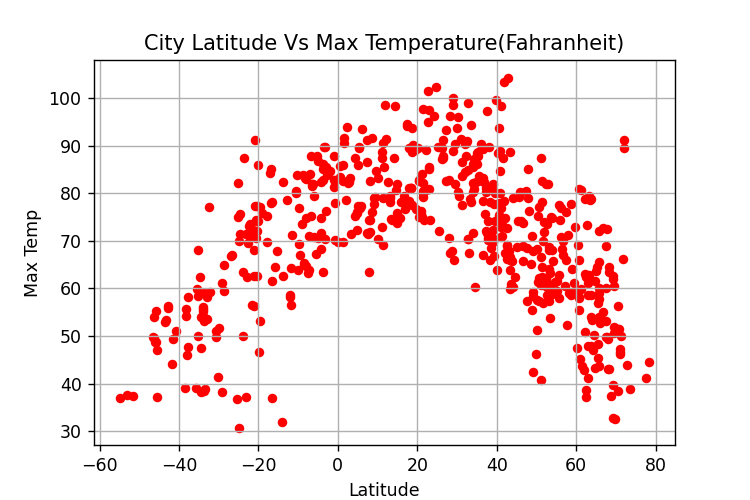

Text(0.5, 1.0, 'City Latitude Vs Max Temperature(Fahranheit)')

In [218]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Max Temp',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Max Temperature(Fahranheit)")



### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


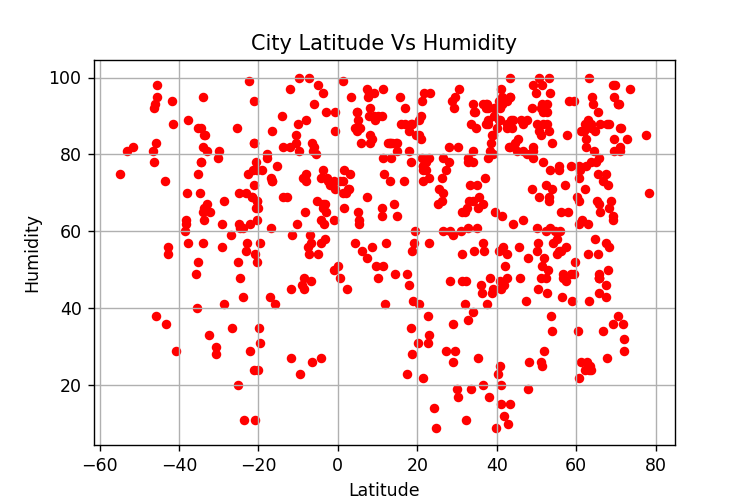

Text(0.5, 1.0, 'City Latitude Vs Humidity')

In [219]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Humidity',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity")


### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


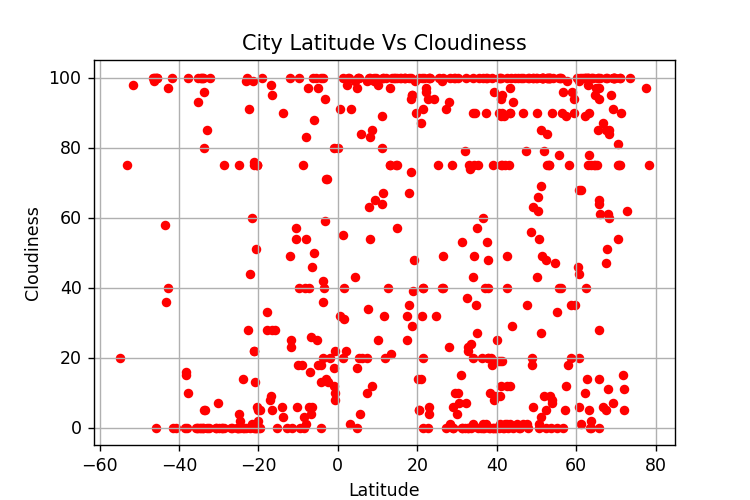

Text(0.5, 1.0, 'City Latitude Vs Cloudiness')

In [221]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Cloudiness',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Cloudiness")

### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


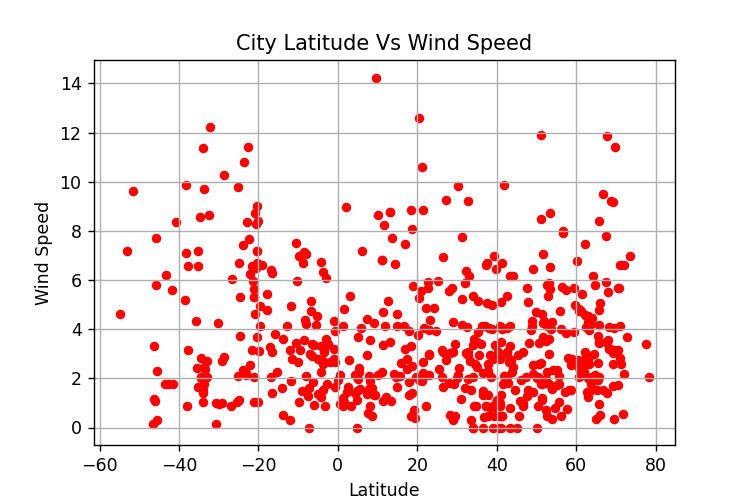

Text(0.5, 1.0, 'City Latitude Vs Wind Speed')

In [222]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Wind Speed',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Wind Speed")

## Linear Regression for Northeren and Southern Hemisphere

In [226]:
# dataframe for northern hemisphere 
north_df = weather_df.loc[weather_df['Latitude'] > 0]
#diplay the df head()
north_df.head()

,City,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date,Country
0,ribeira grande,38.5167,-28.7000,2.06,83,68.396,20,1627627999,PT
5,raha,26.2333,92.5167,3.17,68,89.474,99,1627628112,IN
6,kapaa,22.0752,-159.3190,4.86,76,80.582,96,1627628113,US
8,ponta do sol,32.6667,-17.1000,2.95,78,70.430,23,1627628115,PT
11,jalu,29.0331,21.5482,4.28,26,88.862,0,1627628118,LY


In [227]:
# dataframe for southern hemisphere 
south_df = weather_df.loc[weather_df['Latitude'] < 0]
#diplay the df head()
south_df.head()

,City,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date,Country
1,rikitea,-23.1203,-134.9692,2.23,70,71.402,0,1627628107,PF
2,mar del plata,-38.0023,-57.5575,0.89,70,46.004,0,1627628108,AR
3,labuhan,-6.8844,112.2051,4.73,57,87.764,26,1627628109,ID
4,bluff,-46.6000,168.3333,0.13,81,49.802,100,1627628110,NZ
7,tshikapa,-6.4167,20.8000,2.91,26,81.464,6,1627628114,CD


#### Northern Hemisphere -Humidity vs. Latitude Linear Regression

The value of r is -0.06


<IPython.core.display.Javascript object>


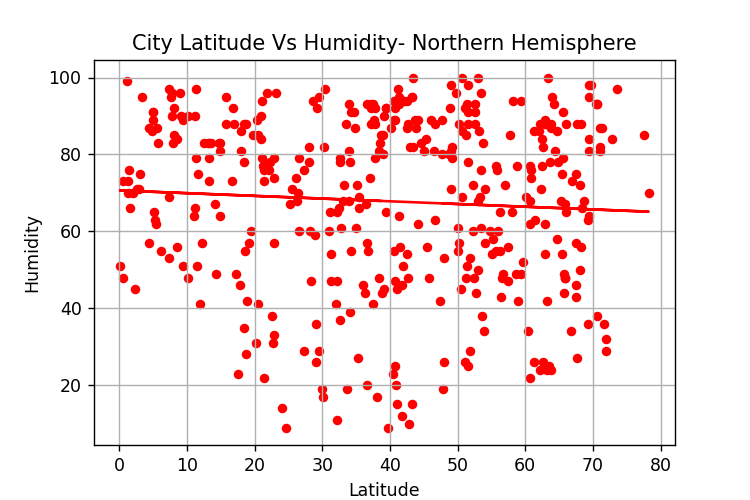

Text(0.5, 1.0, 'City Latitude Vs Humidity- Northern Hemisphere')

In [256]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Humidity'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Humidity',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Northern Hemisphere")


In [257]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Humidity'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')

 #### Southern Hemisphere -Humidity vs. Latitude Linear Regression

The value of r is -0.01


<IPython.core.display.Javascript object>


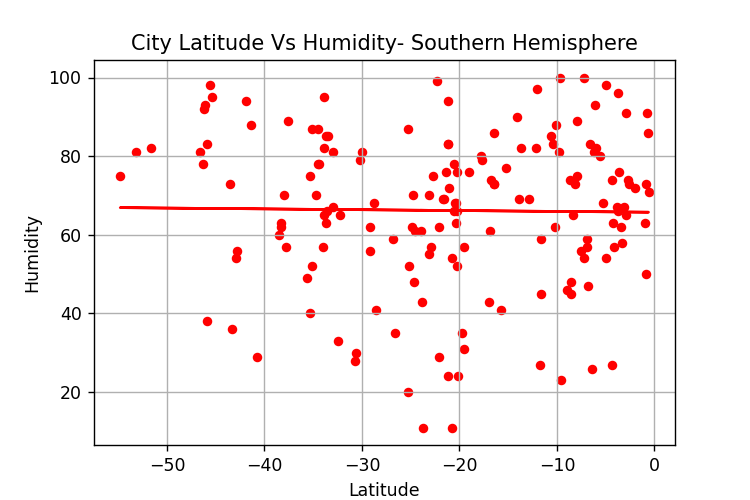

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere')

In [260]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Humidity'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Humidity',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere")


In [261]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Humidity'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r is -0.66


<IPython.core.display.Javascript object>


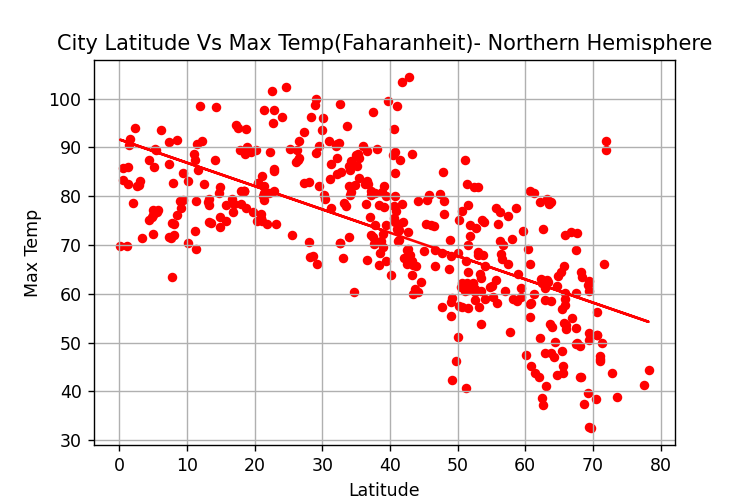

Text(0.5, 1.0, 'City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere')

In [262]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Max Temp'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Max Temp',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere")

In [263]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Max Temp'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression



The value of r is 0.71


<IPython.core.display.Javascript object>


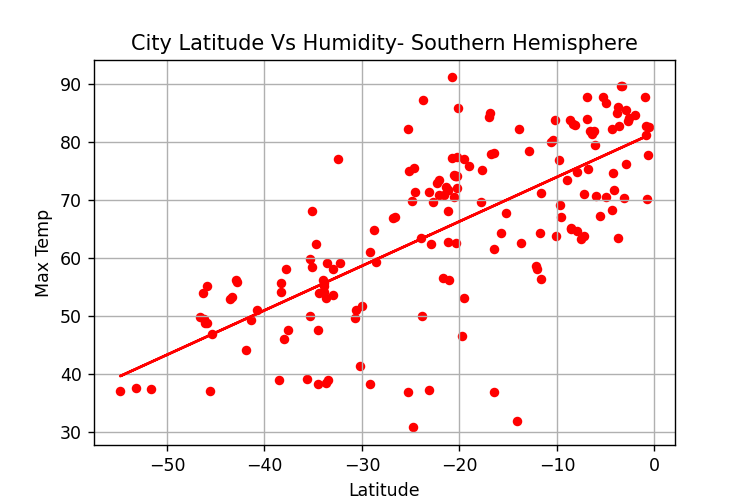

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere')

In [264]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Max Temp'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Max Temp',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere")


In [265]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Max Temp'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')

#### Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

The value of r is 0.04


<IPython.core.display.Javascript object>


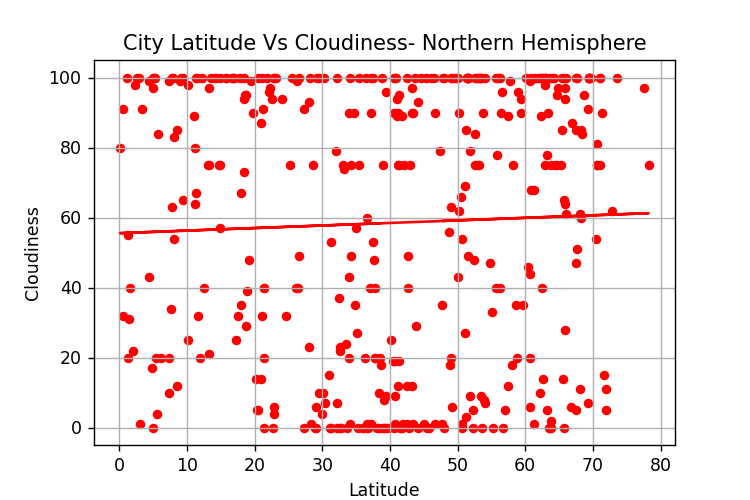

Text(0.5, 1.0, 'City Latitude Vs Cloudiness- Northern Hemisphere')

In [267]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Cloudiness'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Cloudiness',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Cloudiness- Northern Hemisphere")


In [268]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Cloudiness'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')

#### Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

The value of r is -0.11


<IPython.core.display.Javascript object>


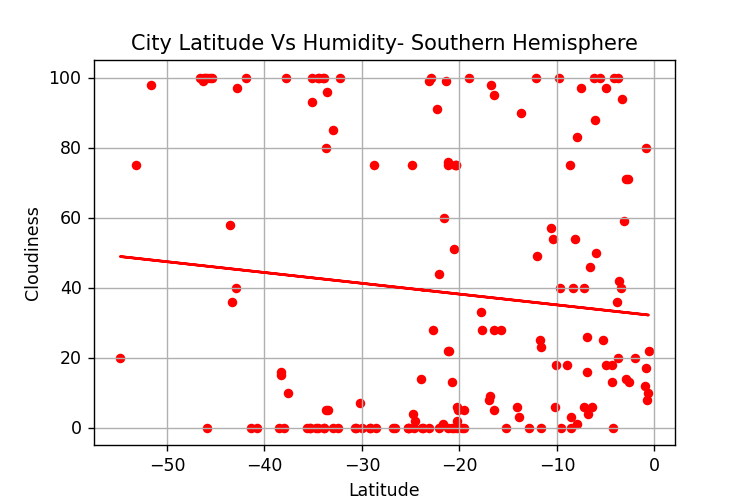

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere')

In [269]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Cloudiness'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Cloudiness',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere")


In [270]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Cloudiness'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r is 0.05


<IPython.core.display.Javascript object>


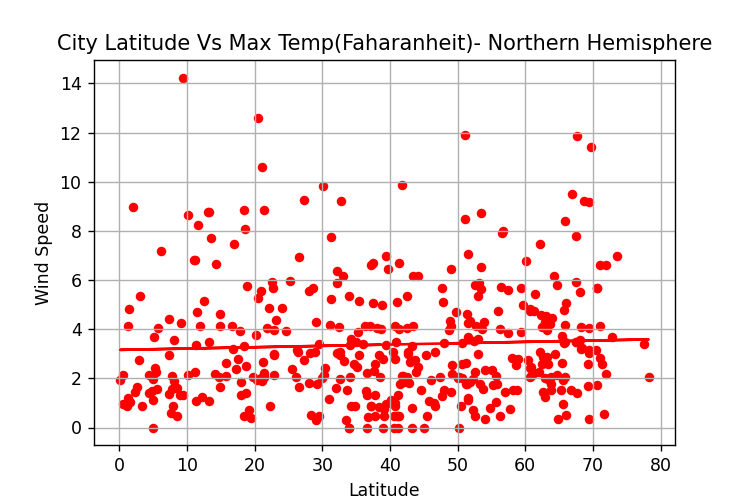

Text(0.5, 1.0, 'City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere')

In [271]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Wind Speed'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Wind Speed',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere")

In [272]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Wind Speed'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r is -0.14


<IPython.core.display.Javascript object>


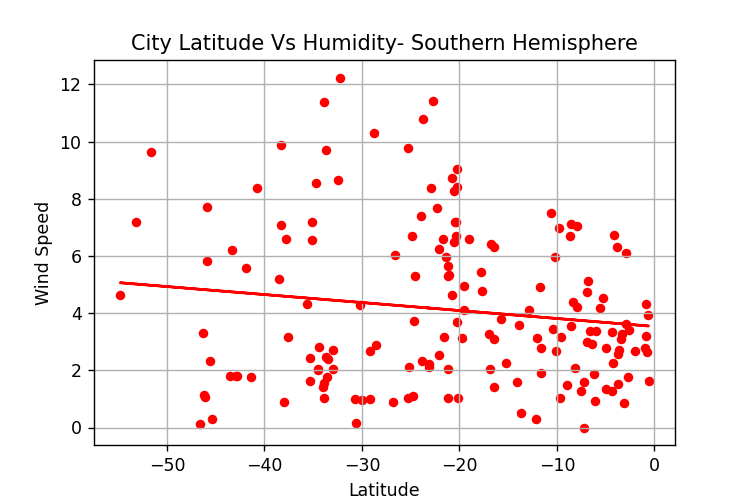

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere')

In [274]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Wind Speed'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Wind Speed',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere")


In [275]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Wind Speed'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')